# Cyclistic Bike-share Case Study

## Introduction

This work is a part of the capstone project for [Google Data Analytics Professional Certificate program](https://www.coursera.org/professional-certificates/google-data-analytics?). The task revolves around providing the marketing team of Cyclistic (a bike-sharing company in Chicago) a recommendation to increase revenue by the means of converting riders with no membership to subscribe into the existing annual membership. A historical ridership data from 2015 to 2022 to understand how casual and member riders uses Cyclistic differently. This insights is then used to provided to advice to the leadership team of Cyclistic on how to design a marketing campaign to convert casual riders into Cyclistic annual members. 

Note that Cyclistic is a fictional entity. The historical data used in the analysis is from Divvy's open-sourced data. 

## Scope of Work

This scope of work is provided as a course guide by the program. 

1. Define and discuss the project
2. Extract and prepare the data for exploration
3. Process the data for analysis
4. Conduct a descriptive analysis
5. Share key findings with stakeholders
6. Act on key findings

## Define and discuss the project

### Business Background

**Business**: provide bike sharing services in the city of Chicago where riders can unlock the bike from one station and returned on any other station in the system at any time. <br/>
**Customer**: to appeal to broad consumer segment Cyclistic has three pricing plans, i.e. single-ride passes, full-day passes, and annual membership. Riders on the first two passes are called casual riders while those who are on annual memberships are called member. <br/>
**Assumptions**:<br/>
- Cyclistic's Finance Analyst has concluded that annual members are more profitable than casual riders. <br/>
- Converting casual riders into members has a better return of investment as compared to targeting all-new customers. <br/>
- The cannibalization effect on this conversion is negligible as profit margin of annual members is significantly higher than casual riders. <br/>
**Campaign Goal**: <br/>
- Design marketing strategies aimed at converting casual riders into annual members

### Scope of Current Project

- To understand the difference between how casual riders and members in using Cyclistic based on historical ride records. <br/>
- To provide the marketing team a recommendation on the conversion strategy based on the needs of casual riders implied from this historical data. <br/>

## Extract and prepare the data for exploration

### Data Used

- Historical data from Jan 2015 to Feb 2022 is provided. However, only data from 2020 and 2021 is used for the analysis due to its recency. <br/>
- Data was extracted from [here](https://divvy-tripdata.s3.amazonaws.com/index.html) and is made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).
- Each row of data represents a single bike trip from one docking station to the end.

### Package Installation

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(tidyr)
library("readxl")
library(lubridate)
library(ggmap)
library(patchwork)
library(gganimate)
library(gifski)
library(png)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [4]:
# load the data
df_trips_2020_123 <- read.csv('data/Divvy_Trips_2020_Q1.csv')
df_trips_2020_4 <- read.csv('data/202004-divvy-tripdata.csv')
df_trips_2020_5 <- read.csv('data/202005-divvy-tripdata.csv')
df_trips_2020_6 <- read.csv('data/202006-divvy-tripdata.csv')
df_trips_2020_7 <- read.csv('data/202007-divvy-tripdata.csv')
df_trips_2020_8 <- read.csv('data/202008-divvy-tripdata.csv')
df_trips_2020_9 <- read.csv('data/202009-divvy-tripdata.csv')
df_trips_2020_10 <- read.csv('data/202010-divvy-tripdata.csv')
df_trips_2020_11 <- read.csv('data/202011-divvy-tripdata.csv')
df_trips_2020_12 <- read.csv('data/202012-divvy-tripdata.csv')

data_2020 <- rbind(df_trips_2020_123, 
              df_trips_2020_4,
              df_trips_2020_5,
              df_trips_2020_6,
              df_trips_2020_7,
              df_trips_2020_8,
              df_trips_2020_9,
              df_trips_2020_10,
              df_trips_2020_11,
              df_trips_2020_12
)

df_trips_2021_1 <- read.csv('data/202101-divvy-tripdata.csv')
df_trips_2021_2 <- read.csv('data/202102-divvy-tripdata.csv')
df_trips_2021_3 <- read.csv('data/202103-divvy-tripdata.csv')
df_trips_2021_4 <- read.csv('data/202104-divvy-tripdata.csv')
df_trips_2021_5 <- read.csv('data/202105-divvy-tripdata.csv')
df_trips_2021_6 <- read.csv('data/202106-divvy-tripdata.csv')
df_trips_2021_7 <- read.csv('data/202107-divvy-tripdata.csv')
df_trips_2021_8 <- read.csv('data/202108-divvy-tripdata.csv')
df_trips_2021_9 <- read.csv('data/202109-divvy-tripdata.csv')
df_trips_2021_10 <- read.csv('data/202110-divvy-tripdata.csv')
df_trips_2021_11 <- read.csv('data/202111-divvy-tripdata.csv')
df_trips_2021_12 <- read.csv('data/202112-divvy-tripdata.csv')

data_2021 <- rbind(df_trips_2021_1,
                   df_trips_2021_2,
                   df_trips_2021_3,
                   df_trips_2021_4,
                   df_trips_2021_5,
                   df_trips_2021_6,
                   df_trips_2021_7,
                   df_trips_2021_8,
                   df_trips_2021_9,
                   df_trips_2021_10,
                   df_trips_2021_11,
                   df_trips_2021_12
)

data <- rbind(data_2020, data_2021)

## View the Data

In [5]:
head(data, 5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
2,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
3,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
4,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
5,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member


In [6]:
## Total number of data/ rides
row_count <- nrow(data)
print(paste('There are ', row_count, 'of bike trips between 2020 and 2021.'))

[1] "There are  9136746 of bike trips between 2020 and 2021."


In [7]:
## Find breakdown between member and casual rider
data %>% group_by(member_casual) %>% 
    summarise(number_of_rides = n()) %>% 
    mutate(normalized = number_of_rides / row_count)


member_casual,number_of_rides,normalized
<chr>,<int>,<dbl>
casual,3895580,0.426364
member,5241166,0.573636


## Data Cleaning


### NA Values

In [9]:
## Check for NA values
sapply(data, function(x) sum(is.na(x)) / row_count * 100) 

ride_id      rideable_type         started_at           ended_at 
        0.00000000         0.00000000         0.00000000         0.00000000 
start_station_name   start_station_id   end_station_name     end_station_id 
        0.00000000         0.91480052         0.00000000         1.07374113 
         start_lat          start_lng            end_lat            end_lng 
        0.00000000         0.00000000         0.09878791         0.09878791 
     member_casual 
        0.00000000

Percentage of empty rows are negligible (<1%) compared to all data we have. Therefore, we would remove all the empty rows

In [10]:
### Removal NA values
data <- data[complete.cases(data), ]
row_count <- nrow(data) ## update number of rows in the data
print(paste('There are', row_count, 'of bike trips left in the analysis.'))


[1] "There are 8997224 of bike trips left in the analysis."


### Duplicated Data

In [11]:
## Duplicated Data
duplicated_count <- sum(duplicated(data$ride_id)) 
print(paste('There are', duplicated_count, 'of bike trips which has duplicated ride_id.'))


[1] "There are 208 of bike trips which has duplicated ride_id."


As there is only <1% duplicated entries based on the ride-id, these entries will be removed from our analysis without any material difference in the final result.

In [12]:
### Removal of Duplicated Data
data <- data[!duplicated(data$ride_id), ]
row_count <- nrow(data) ## update number of rows in the data
print(paste('There are', row_count, 'of bike trips left in the analysis.'))

[1] "There are 8997016 of bike trips left in the analysis."


### Start Time after End Time

In [13]:
data$ride_length_in_mins <- as.double(difftime(data$ended_at, data$started_at, units = "mins"))

In [14]:
wrong_time <- sum(data$ride_length_in_mins < 0) 
print(paste('There are', wrong_time, 'of bike trips which has a start time after end time.'))

[1] "There are 10569 of bike trips which has a start time after end time."


In [15]:
### Removal of Start time after end time
data <- data[!data$ride_length_in_mins < 0, ]
row_count <- nrow(data) ## update number of rows in the data
print(paste('There are', row_count, 'of bike trips left in the analysis.'))

[1] "There are 8986447 of bike trips left in the analysis."


In [16]:
wrong_time_2 <- sum(data$ride_length_in_mins > 12*60) 
print(paste('There are', wrong_time_2, 'of bike trips which lasted more than 12h.'))

[1] "There are 9782 of bike trips which lasted more than 12h."


In [17]:
### Removal of bike ride longer than 12h
data <- data[!data$ride_length_in_mins > 12*60, ]
row_count <- nrow(data) ## update number of rows in the data
print(paste('There are', row_count, 'of bike trips left in the analysis.'))

[1] "There are 8976665 of bike trips left in the analysis."


### Validating GPS Location

#### Starting Station

In [19]:
max_lat <- data$start_lat %>% max()
min_lat <- data$start_lat %>% min()
max_lng <- data$start_lng %>% max()
min_lng <- data$start_lng %>% min()
ctr_lat <- (max_lat+min_lat)/2
ctr_lng <- (max_lng+min_lng)/2

p <- ggmap(get_googlemap(center = c(lon = ctr_lng, lat = ctr_lat),
                    zoom = 11, scale = 2,
                    maptype ='roadmap'))

Source : https://maps.googleapis.com/maps/api/staticmap?center=41.855,-87.68&zoom=11&size=640x640&scale=2&maptype=roadmap&key=xxx



In [20]:
start_loc <- data %>% 
  group_by(start_lat, start_lng, member_casual) %>% 
  summarise(number_of_stops = n()) %>% 
  na.omit() %>% 
  arrange(desc(number_of_stops))

`summarise()` has grouped output by 'start_lat', 'start_lng'. You can override
using the `.groups` argument.


Warning message:
“Removed 18957 rows containing missing values (geom_point).”


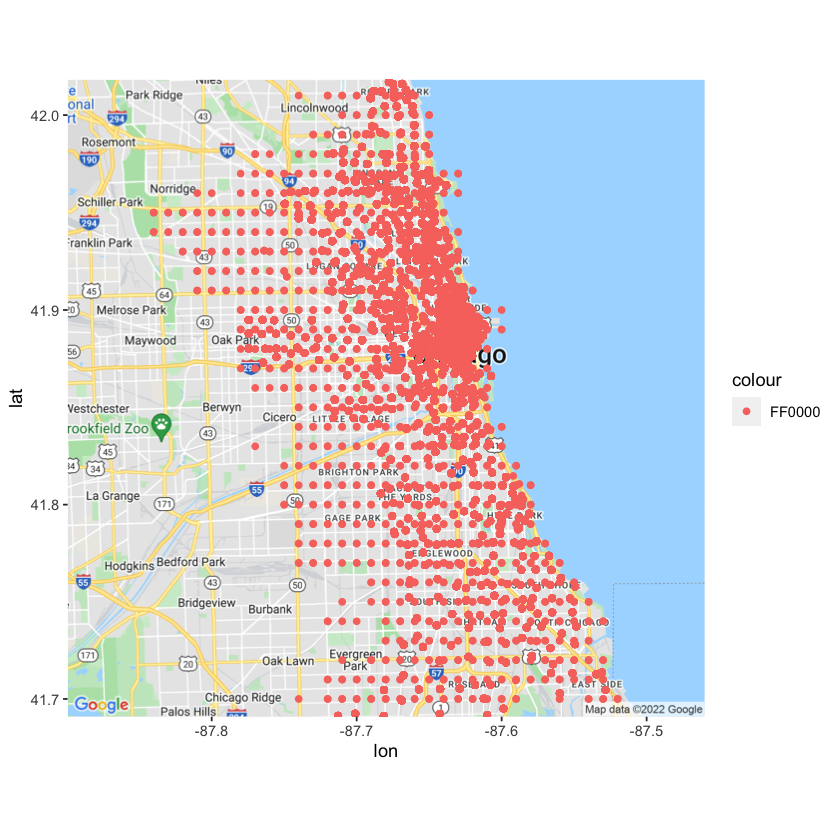

In [21]:
p + geom_point(data = start_loc, aes(x=start_lng, y=start_lat, color='FF0000'))

There are a few stations that are located in the water. However, It does not seem that the numbers are significant so we will leave it be for now. 

#### End Station

We will also quickly check if the distribution of end station location similar to those of the starting station. We should expect it would be very similar. 

In [22]:
max_lat_end <- data$end_lat %>% max()
min_lat_end <- data$end_lat %>% min()
max_lng_end <- data$end_lng %>% max()
min_lng_end <- data$end_lng %>% min()

In [23]:
end_loc <- data %>% 
  group_by(end_lat, end_lng, member_casual) %>% 
  summarise(number_of_stops = n()) %>% 
  na.omit() %>% 
  arrange(desc(number_of_stops))

`summarise()` has grouped output by 'end_lat', 'end_lng'. You can override
using the `.groups` argument.


Warning message:
“Removed 18057 rows containing missing values (geom_point).”


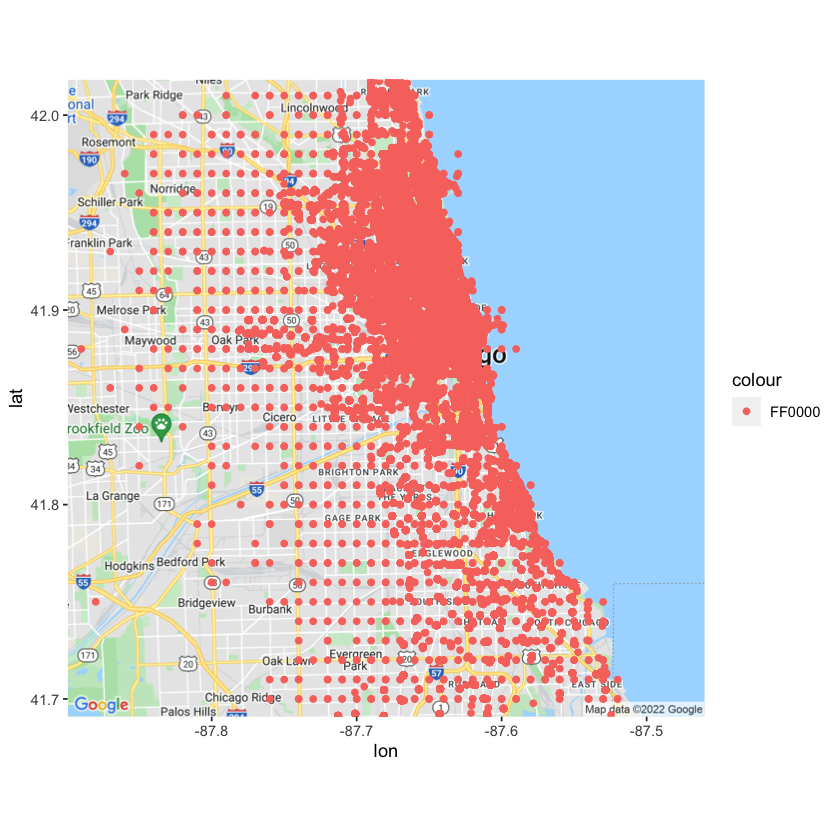

In [24]:
p + geom_point(data = end_loc, aes(x=end_lng, y=end_lat, color='FF0000'))

Visually we can tell that there are more unique end station location compared to start station location. This indicates that there are many bikes that are picked up from the indicated station but was left/ abandon in non-valid station points. 

## Add columns for futher analysis

In [25]:
data$start_date <- as.Date(data$started_at)
data$start_month_year <- format(as.Date(data$start_date), '%b_%y')
data$start_year <- format(as.Date(data$start_date), '%y')
data$day_of_week <- format(as.Date(data$start_date), '%A')
data$hour <- as.integer(hour(data$started_at))
data$duration_in_mins <- as.double(difftime(data$ended_at, data$started_at)/60)

In [26]:
data$weekday_weekend <- 'weekday'
data$weekday_weekend[data$day_of_week == 'Saturday'] <- 'weekend'
data$weekday_weekend[data$day_of_week == 'Sunday'] <- 'weekend'

### Create an Order List

In [27]:
# Create order list for day of week
unique(data$day_of_week)

[1] "Tuesday"   "Thursday"  "Monday"    "Friday"    "Wednesday" "Sunday"   
[7] "Saturday"

In [28]:
data$day_of_week <- ordered(data$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", 
                                                                   "Friday", "Saturday", "Sunday"))

In [29]:
# Create order list for month of year
unique(data$start_month_year)

[1] "Jan_20" "Feb_20" "Mar_20" "Apr_20" "May_20" "Jun_20" "Jul_20" "Aug_20"
 [9] "Sep_20" "Oct_20" "Nov_20" "Dec_20" "Jan_21" "Feb_21" "Mar_21" "Apr_21"
[17] "May_21" "Jun_21" "Jul_21" "Aug_21" "Sep_21" "Oct_21" "Nov_21" "Dec_21"

In [30]:
data$start_month_year <- ordered(data$start_month_year, levels = c("Jan_20", "Feb_20", "Mar_20", 
                                                                    "Apr_20", "May_20", "Jun_20",
                                                                    "Jul_20", "Aug_20", "Sep_20", 
                                                                    "Oct_20", "Nov_20", "Dec_20",
                                                                    "Jan_21", "Feb_21", "Mar_21", 
                                                                    "Apr_21", "May_21", "Jun_21",
                                                                    "Jul_21", "Aug_21", "Sep_21", 
                                                                    "Oct_21", "Nov_21", "Dec_21"))

### Save Final Dataframe

In [31]:
# write.csv(data, 'data_processed.csv')

## Exploratory Data Analysis

### Day of Week Distribution

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


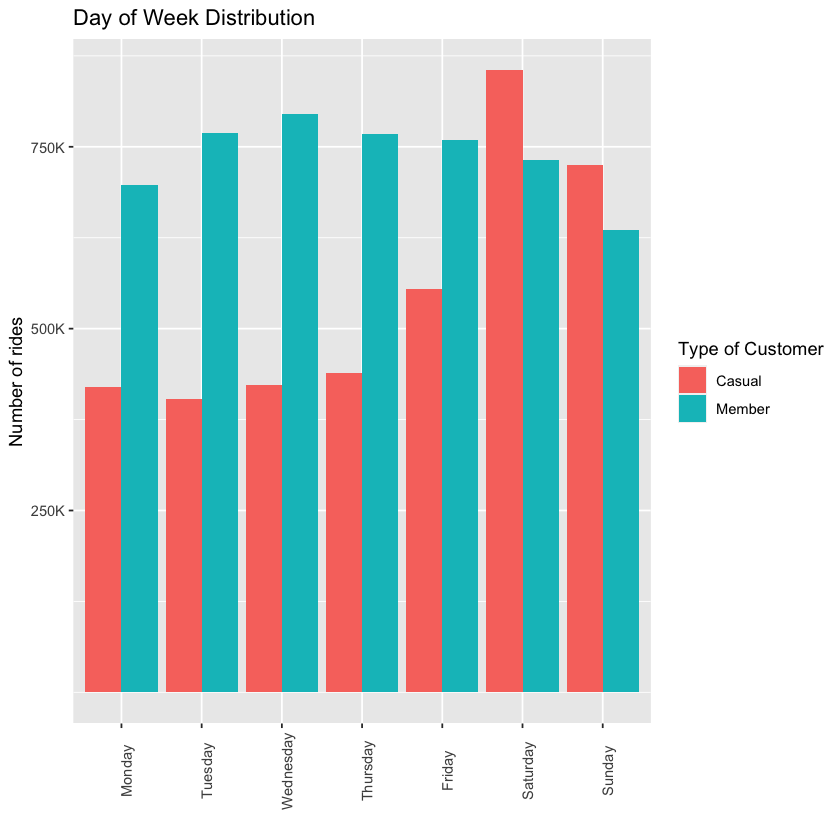

In [32]:
data %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=day_of_week, y=number_of_rides, fill=member_casual)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of customer', title='Day of Week Distribution') + 
  scale_y_continuous(breaks = c(250000, 500000, 750000), labels = c("250K", "500K", "750K")) + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_discrete(name='Type of Customer', labels = c('Casual', 'Member'))

It can be seen that Casual riders are more likely to rent a bike on weekends especially on Saturday while members bike rent pattern peaking on a mid-week. This shows that the casual and member population consist of two different types of people which correlates to commuter vs leisure driver. Having this information is crucial as we can better understand their needs/ motivation in renting the bike. 

### Duration of Ride

In [33]:
data %>% 
  group_by(member_casual) %>% 
  summarise(number_of_rides = mean(duration_in_mins))

member_casual,number_of_rides
<chr>,<dbl>
casual,28.96011
member,13.85517


Inline with the findings that casual vs member riders rent a bike for commuting vs leisure, the duration of the ride shows that member's trip is on average only half the duration of casual rider's. This shows that members are likely to rent a bike to bring him/her from point A/ B while casual riders likely to stroll/ explore locations around the city.

### Time of Day

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


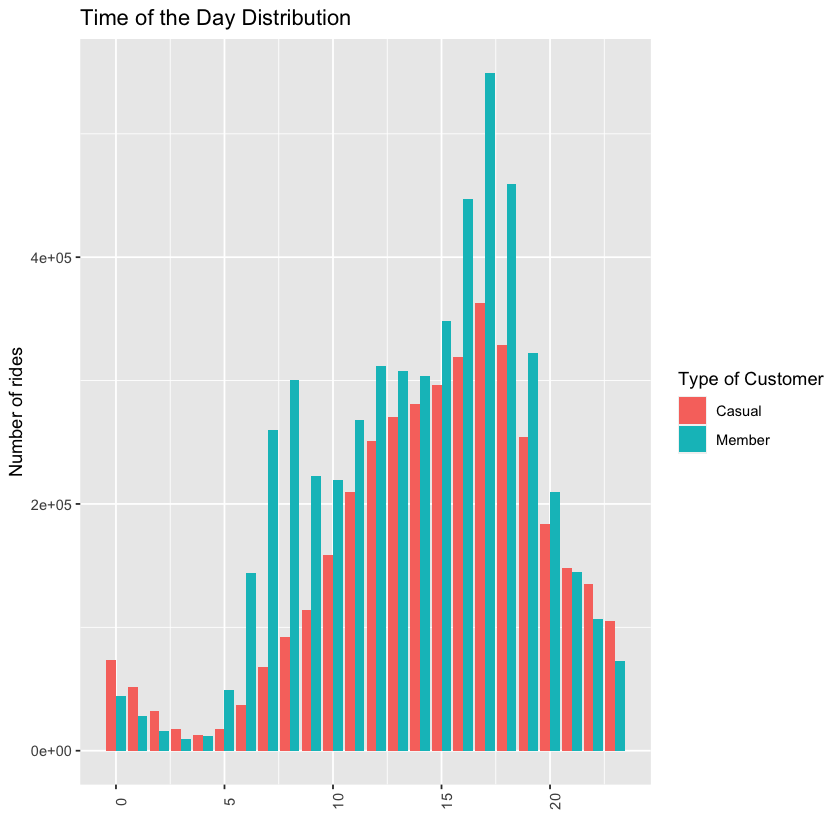

In [34]:
data %>% 
  group_by(member_casual, hour) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=hour, y=number_of_rides, fill=member_casual)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of customer', title='Time of the Day Distribution') + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_discrete(name='Type of Customer', labels = c('Casual', 'Member'))

There are different peaks for most popular time to rent a bike between casual and member riders. Members usually rent during morning peak (8-9AM) and evening peak (6-7PM) which further confirms our earlier postulation that these riders uses our service to go to work and return home. On the other hand, casual riders most popular time is at 6-7PM. 

Let's further break this down into weekday and weekend pattern. 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


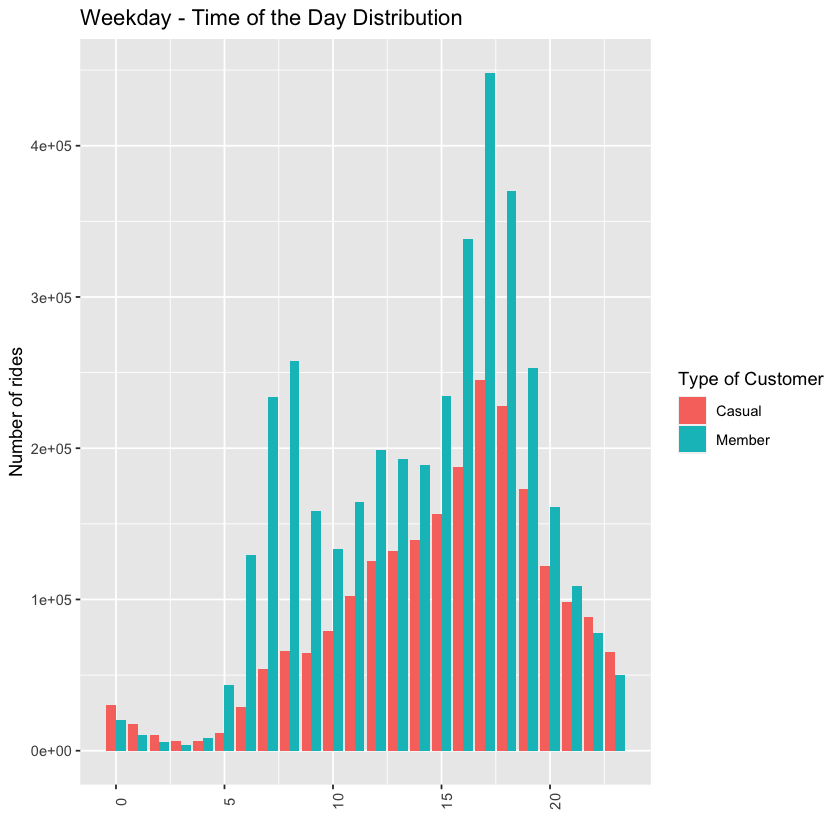

In [35]:
data %>% 
  filter(data$weekday_weekend == 'weekday')  %>% 
  group_by(member_casual, hour) %>%  
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=hour, y=number_of_rides, fill=member_casual)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of customer', title='Weekday - Time of the Day Distribution') + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_discrete(name='Type of Customer', labels = c('Casual', 'Member'))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


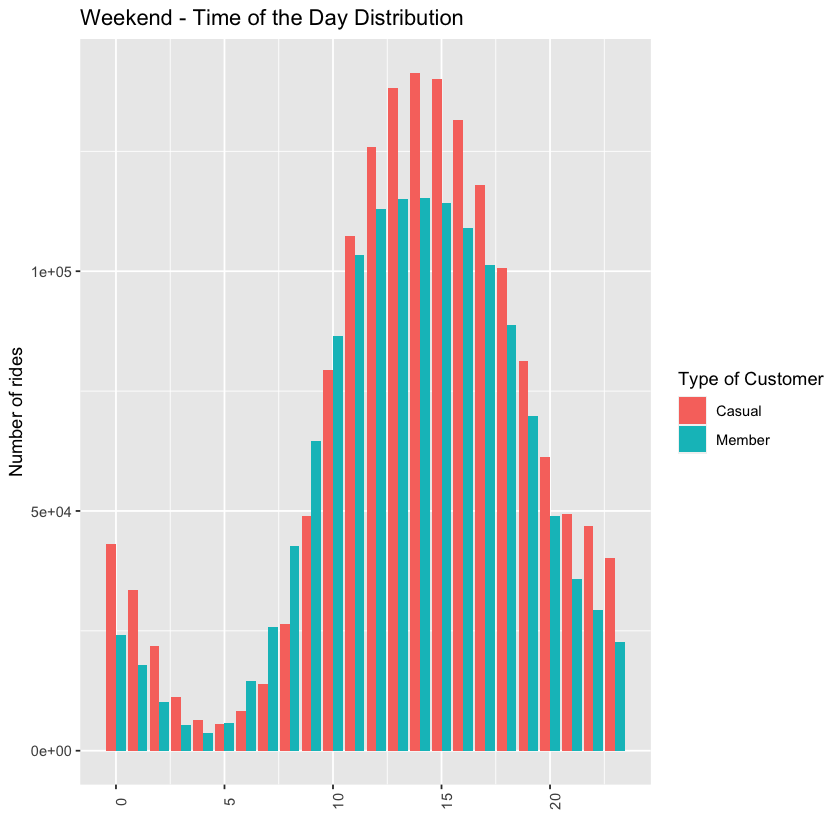

In [36]:
data %>% 
  filter(data$weekday_weekend == 'weekend')  %>% 
  group_by(member_casual, hour) %>%  
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=hour, y=number_of_rides, fill=member_casual)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of customer', title='Weekend - Time of the Day Distribution') + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_discrete(name='Type of Customer', labels = c('Casual', 'Member'))

Interestingly, a completely different pictures are seen on weekday and weekend charts. 

On the Weekday chart, there are two peaks on the most popular time of the day to rent a bike only for member riders which are during the morning and evening peak. On the other hand, on the Weekend chart, both casual and member riders behaves very similarly, i.e. high peak at about 1-6PM. This means the member riders are also renting a bike to ride for leisure, but only on the weekend. 

### Seasonality

In [37]:
head(data, 1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_length_in_mins,start_date,start_month_year,start_year,day_of_week,hour,duration_in_mins,weekday_weekend
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<date>,<ord>,<chr>,<ord>,<int>,<dbl>,<chr>
1,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,⋯,-87.6674,member,7.516667,2020-01-21,Jan_20,20,Tuesday,20,7.516667,weekday


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


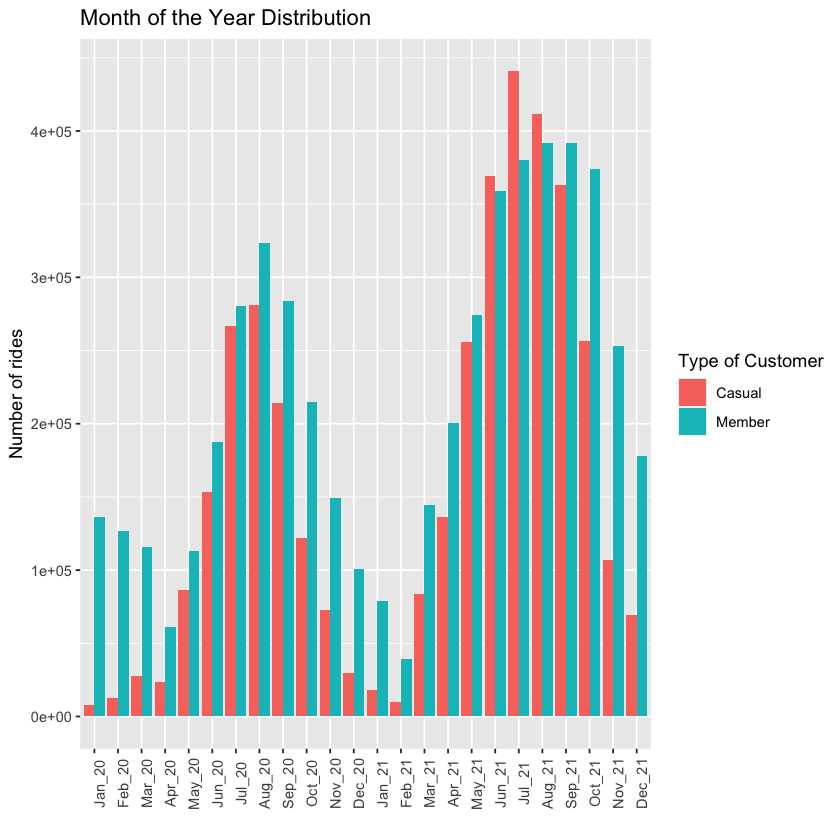

In [38]:
data %>% 
  group_by(member_casual, start_month_year) %>%  
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x=start_month_year, y=number_of_rides, fill=member_casual)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of customer', title='Month of the Year Distribution') + 
  theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_discrete(name='Type of Customer', labels = c('Casual', 'Member'))

Most riders tend to avoid winter month as winter weather in Chicago is not friendly for bike riding around the city. However, it is more likely for a rider to ride on a cold winter day if they are a member. 

### Type of the Bike

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


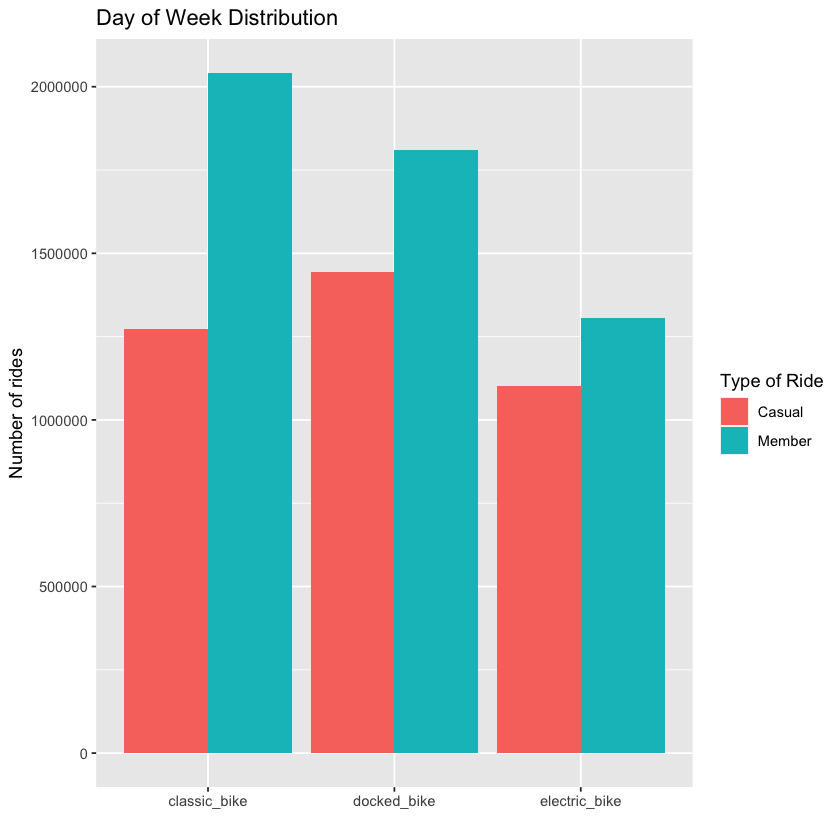

In [39]:
data %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(fill=member_casual, y=number_of_rides, x=rideable_type)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of Bike', title='Day of Week Distribution') + 
  scale_fill_discrete(name='Type of Ride', labels = c('Casual', 'Member'))

We have no data on the numbers of available bikes for each type. However, we know that classic bike is the most popular amongst member rider while casual riders prefers docked bike. Both types of riders have lesser numbers of rent using electric bike. 

In a first glance, this is counterintuitive as people are most likely to choose an electric bike over classic or docked bike especially for member riders who commute to work. This patter is likely resulted due to the fact that electric bike is not widely available across the city and the most common type of bike is classic bike which boost its rent popularity. 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


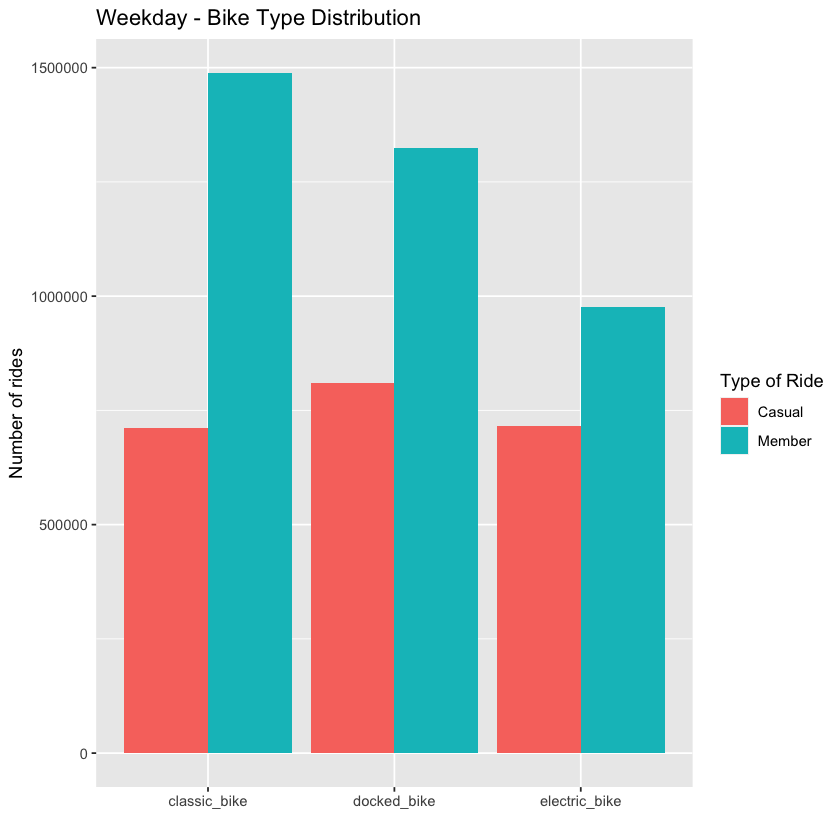

In [60]:
data %>% 
  filter(data$weekday_weekend == 'weekday')  %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(fill=member_casual, y=number_of_rides, x=rideable_type)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of Bike', title='Weekday - Bike Type Distribution') + 
  scale_fill_discrete(name='Type of Ride', labels = c('Casual', 'Member'))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


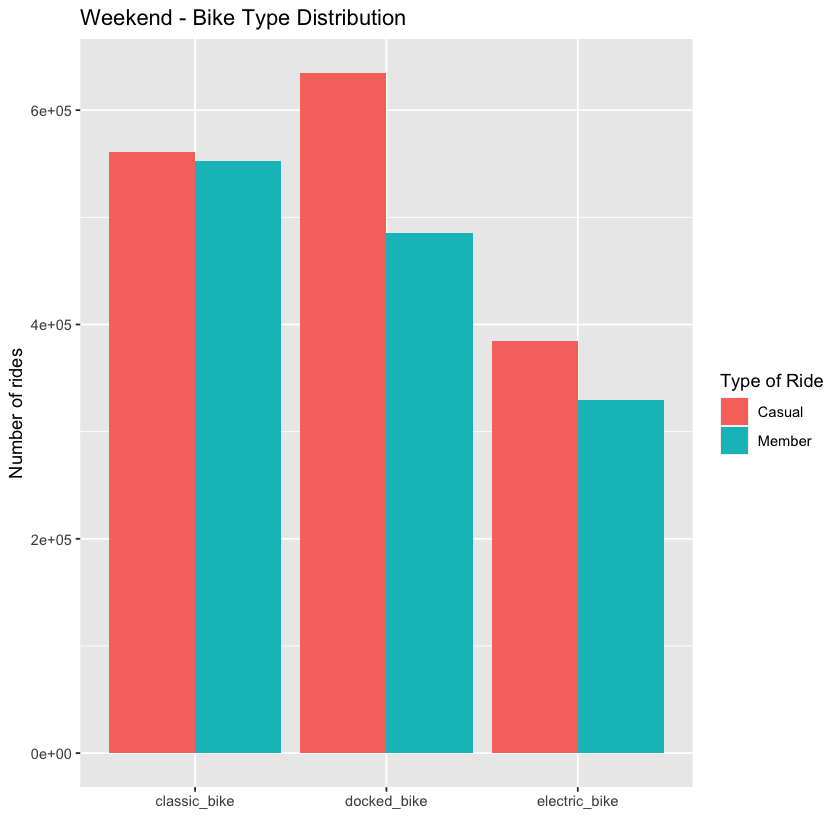

In [59]:
data %>% 
  filter(data$weekday_weekend == 'weekend')  %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(fill=member_casual, y=number_of_rides, x=rideable_type)) + 
  geom_col(position='dodge') + 
  labs(x='', y='Number of rides', fill='Type of Bike', title='Weekend - Bike Type Distribution') + 
  scale_fill_discrete(name='Type of Ride', labels = c('Casual', 'Member'))

It is interesting also to observe that classic bike might be popular among member riders due to the fact that you can start/ end the journey as near to your house while docked bike are mostly available around the public spaces/ metro stations which is suitable for casual rider who just wants to explore the city on the weekend. 

### Popular Stations

In [56]:
data_m <- data %>% filter(member_casual == 'member')
data_c <- data %>% filter(member_casual == 'casual')

start_loc_m <- data_m %>% 
  group_by(start_lat, start_lng) %>% 
  summarise(number_of_stops = n()) %>% 
  na.omit() %>% 
  arrange(desc(number_of_stops))

start_loc_c <- data_c %>% 
  group_by(start_lat, start_lng) %>% 
  summarise(number_of_stops = n()) %>% 
  na.omit() %>% 
  arrange(desc(number_of_stops))

max_stop_m <- start_loc_m$number_of_stops %>% max()
max_stop_c <- start_loc_c$number_of_stops %>% max()

start_loc_m$popularity <- start_loc_m$number_of_stops / max_stop_m
start_loc_c$popularity <- start_loc_c$number_of_stops / max_stop_c

`summarise()` has grouped output by 'start_lat'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'start_lat'. You can override using the
`.groups` argument.


Warning message:
“Removed 78 rows containing missing values (geom_point).”


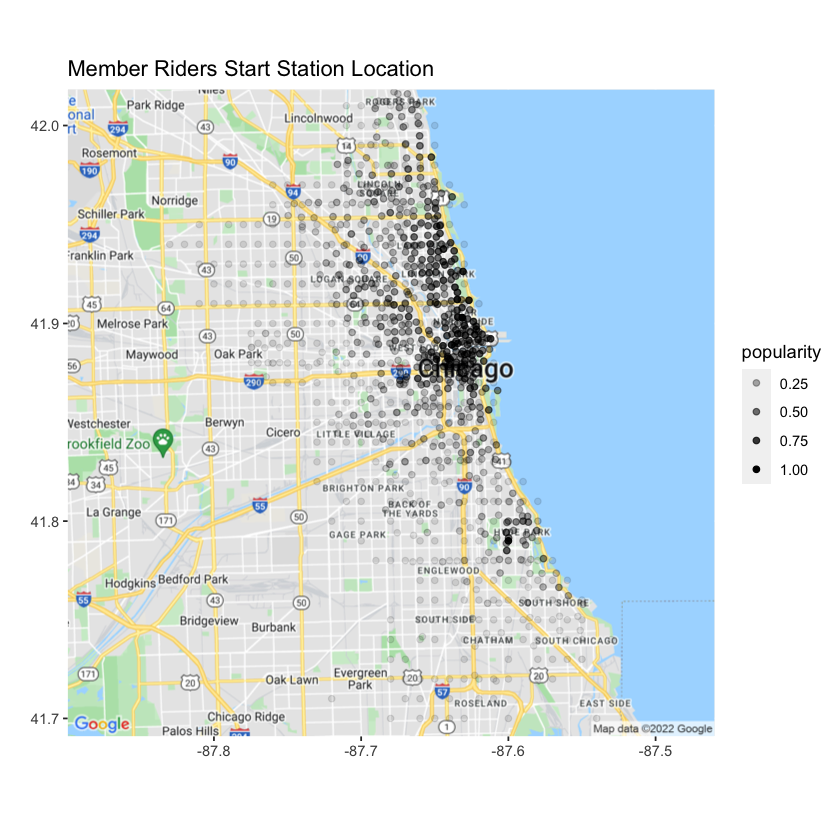

In [67]:
p + 
  geom_point(data = start_loc_m %>% filter (popularity > 0.001), aes(x=start_lng, y=start_lat, alpha=popularity)) + 
  labs(x='', y='', fill='Popularity', title='Member Riders Start Station Location')


Warning message:
“Removed 59 rows containing missing values (geom_point).”


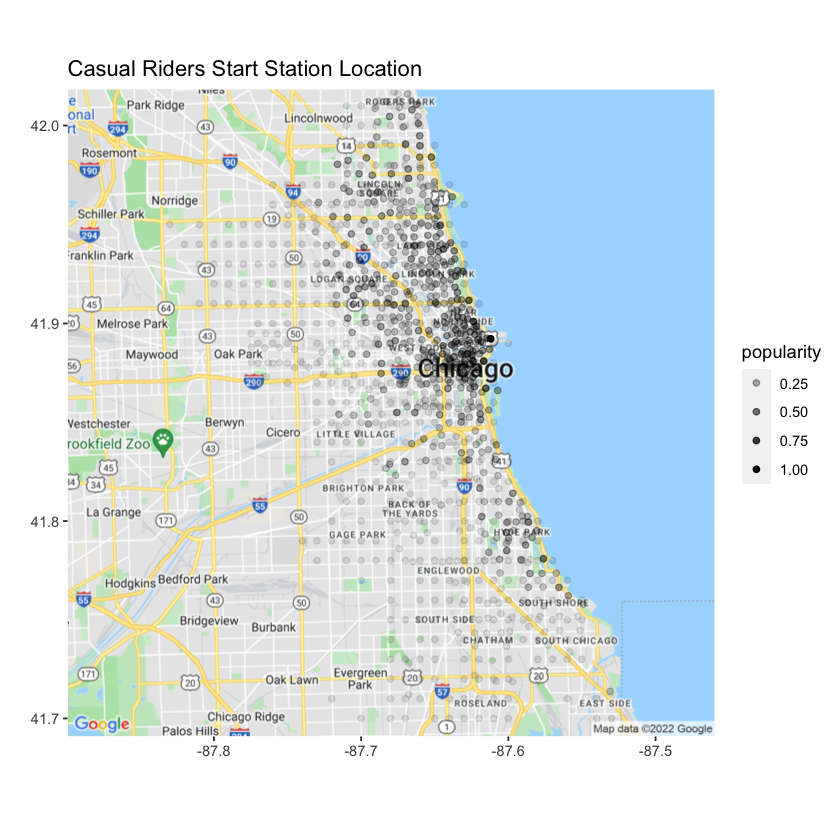

In [61]:
p + 
  geom_point(data = start_loc_c %>% filter (popularity > 0.001), aes(x=start_lng, y=start_lat, alpha=popularity)) + 
  labs(x='', y='', fill='Popularity', title='Casual Riders Start Station Location')


#### Animation

In [97]:
start_loc_t <- data %>% 
  group_by(start_lat, start_lng, hour) %>% 
  summarise(number_of_stops = n()) %>% 
  na.omit() %>% 
  arrange(desc(number_of_stops))

max_stop_t <- start_loc_t$number_of_stops %>% max()
start_loc_t$popularity <- start_loc_t$number_of_stops / max_stop_t

static <- p + geom_point(data = start_loc_t, aes(x=start_lng, y=start_lat, alpha=popularity))

anim = static + transition_time(hour) + labs(title = 'Time: {frame_time}')

animate(anim, nframes = 24, renderer = gifski_renderer("gganim.gif"))

`summarise()` has grouped output by 'start_lat', 'start_lng'. You can override
using the `.groups` argument.
Warning message:
“Removed 388 rows containing missing values (geom_point).”
Warning message:
“Removed 388 rows containing missing values (geom_point).”

Rendering [=>------------------------------------------] at 3.4 fps ~ eta:  7s
Warning message:
“Removed 204 rows containing missing values (geom_point).”

Rendering [===>----------------------------------------] at 3.6 fps ~ eta:  6s
Warning message:
“Removed 149 rows containing missing values (geom_point).”

Rendering [=====>--------------------------------------] at 3.9 fps ~ eta:  5s
Warning message:
“Removed 156 rows containing missing values (geom_point).”

Rendering [======>-------------------------------------] at 4.1 fps ~ eta:  5s
Warning message:
“Removed 143 rows containing missing values (geom_point).”

Rendering [========>-----------------------------------] at 4.3 fps ~ eta:  4s
Warning message:
“Removed 218 rows 

The rendered annimation is attached in the same github folder. 

There are no significant difference between the location of startion station between casual and member riders where both riders tend to start in the middle of the city. 

## Summary of Observations

There are similarities and difference between the way casual and member riders are using Cyclistic bike-sharing service.

### Similarities between member and casual riders

1. Both groups tend to avoid winter month to rent a bike as the weather becomes unbearable to be outdoors during the season. 
2. Despite their difference in renting time distribution across the day on a weekday, casual and member riders have a similar booking pattern on a weekend which peaks at 1-6PM. 
3. The type of bike that both population books the least is electric bike. 
4. Riders tend to start their journey from the city centre. 

### Differences between member and casual riders

| Member Rider                                                                                                  	| Casual Rider                                                                                    	|
|---------------------------------------------------------------------------------------------------------------	|-------------------------------------------------------------------------------------------------	|
| - Riders tend to rent more on a weekday than a weekend.                                                       	| - Riders tend to rent more on a weekend than a weekday.                                         	|
| - There are two renting peak hours on a weekday which overlaps with morning and evening peak hours.           	| - The most popular renting time is between 1-6PM on a weekend.                                  	|
| - Based on the first two points above, Riders tend to use Cyclistic service for daily work/ school commuting. 	| - Based on the first two points above, Riders tend to use Cyclistic service for leisure travel. 	|
| - Relative to a casual riders' average trip, a members' trip is generally shorter by more than 50%.           	| - Relative to a member riders' trip, a casual riders' trip is generally longer.                 	|
| - Riders rent more of classic type bike compared to docked and electric bike.                                 	| - Riders rent more docked type of bike compared to classical and electric bike.                 	|
| - Riders are more likely to rent a bike on a winter day than a casual rider.                                  	| - Riders are less likely to rent a bike on a winter day than a casual rider.                    	|

## Recommendations

The current data provides us with a good starting point to understand the renting behaviour of our existing customers. We can generally observe that Member riders are primarily using our service for daily work/ school commuting while Casual riders for leisure rides. At this point, we are in a juncture to use this insights we have to propose some solutions that may serve our general understanding towards leisure riders or to collect further evidence and data points to better comprehend the needs of our customers. 

Data points such as demographic, disposable income, domicile and general feedback would be extremely helpful to adjust our offering. Some example of different feedback we could get:

1. Pricing of our current membership is too expensive
- We can provide discount for a subset of the target population who are more price sensitive for example students by giving Student Discount. Alternatively, we can work with the education instutitions across the city to encourage students to pick up riding bikes to commute. Another option we can explore is to provide family bundle which allows the parents to cover the cost of the child commuting expenses instead of the child themselves who needs to fork out on their own.

2. Weekend needs
- As we know, most of our casual riders only rent our bikes on the weekend. Having a membership might not be economically sensible with the current membership package. One of the offering we could provide us to open up a third membership option for weekends which will capture these population while still serving their needs. It is imporatnt to note, however, the cannibalization effect that it may impose to the existing members. 

3. Not getting the bike when needed
- We can also provide special perks for our membership that allows them to book the bike in advance, allowing them to have a peace in mind knowing that they will have the bike when needed. This can relate to the type of bike too as different people might have different preference of bike type. Having specific bike membership also allows us to gauge the fleet size we should maintain for each type. 

4. No reason/ needs to cycle frequently
- Provision of gamification within our ecosystem to bike more often is useful to encourage people to switch their mode of transport to biking. The reason why casual riders only rides on the weekend is likely that they use another mode of transport for weekday commuting. Providing more incentive to take up biking is essentially to convert this population. 